In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from ts_avg import MultiseasonalAveraging

In [3]:
start_date = pd.to_datetime('2/1/2023')
end_date = pd.to_datetime('3/1/2023')
date_series = pd.date_range(start=start_date, end=end_date, freq=pd.to_timedelta('6h'), closed='left')
df = pd.DataFrame({'date': date_series})
df['y'] = df.index
df['y'] = df['y'].apply(lambda x: 1 + np.cos(0.05*(x%4)) + 0.025*((x//4)%7))


<AxesSubplot:xlabel='date'>

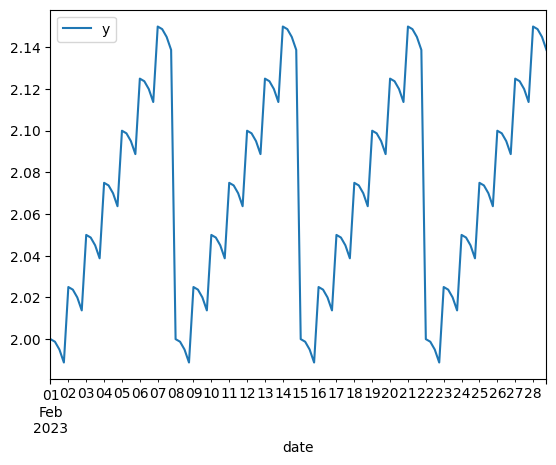

In [4]:
df.plot('date', 'y')

In [5]:
ma1 = MultiseasonalAveraging(df, date='date', y='y')

In [6]:
seasonal_dict_list = [{'period': 4, 'function': 'self'},
                      {'period': 28, 'function': 'self'},
                      {'period': 112, 'function': 'self'}]

In [7]:
ma1.get_averages(seasonal_dict_list, 112, 'test')
df2 = ma1.avg_df_list[0]['avg_df']

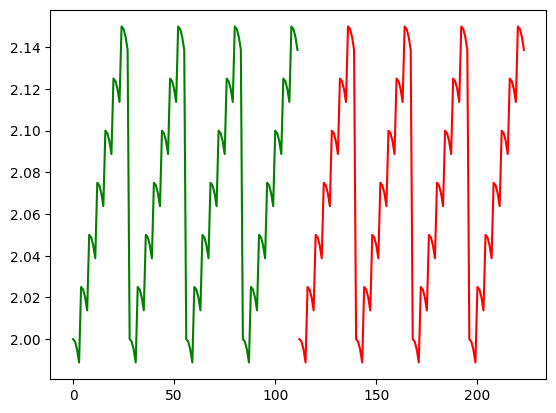

In [8]:
plt.plot(df.index, df['y'], 'g-')
plt.plot(df2.index, df2['yhat'], 'r-')


In [9]:
pd.Index(range(111,113))

RangeIndex(start=111, stop=113, step=1)

In [10]:
df2

,date,yhat
112,2023-03-01 00:00:00,2.000000
113,2023-03-01 06:00:00,1.998750
114,2023-03-01 12:00:00,1.995004
115,2023-03-01 18:00:00,1.988771
116,2023-03-02 00:00:00,2.025000
...,...,...
219,2023-03-27 18:00:00,2.113771
220,2023-03-28 00:00:00,2.150000
221,2023-03-28 06:00:00,2.148750
222,2023-03-28 12:00:00,2.145004


In [11]:
pd.Series(df2.index) * 100

0      11200
1      11300
2      11400
3      11500
4      11600
       ...  
107    21900
108    22000
109    22100
110    22200
111    22300
Length: 112, dtype: int64

In [12]:
import itertools